# Online Retails Purchase
### Step 1. Import the necessary libraries

In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks")

### Step 2. Import the dataset from this address.
### Step 3. Assign it to a variable called online_rt

In [5]:
online_rt = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv", encoding = 'latin1')
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

Text(0.5, 1.0, '10 Countries with most orders')

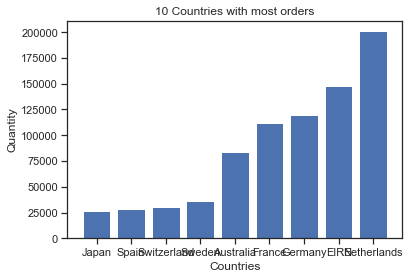

In [98]:
top_10 = online_rt.groupby('Country').Quantity.sum().sort_values().tail(11)
top_10 = top_10[1:10]
label = top_10.index

plt.bar(label, top_10)
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

#Or 
# #group by the Country
# countries = online_rt.groupby('Country').sum()

# # sort the value and get the first 10 after UK
# countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

# # create the plot
# countries['Quantity'].plot(kind='bar')

# # Set the title and labels
# plt.xlabel('Countries')
# plt.ylabel('Quantity')
# plt.title('10 Countries with most orders')

# # show the plot
# plt.show()

### Step 5. Exclude negative Quantity entries

In [30]:
online_rt = online_rt.loc[online_rt.Quantity >=0]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

,Quantity,UnitPrice,Revenue
CustomerID,,,
12426.0,258,118.09,582.73
12427.0,533,142.26,825.80
12468.0,366,133.57,729.54
12471.0,8212,1978.17,19824.05
12472.0,4148,812.81,6572.11
...,...,...,...
14016.0,2125,635.88,4341.21
14156.0,57885,5357.68,117379.63
14335.0,379,144.24,468.26


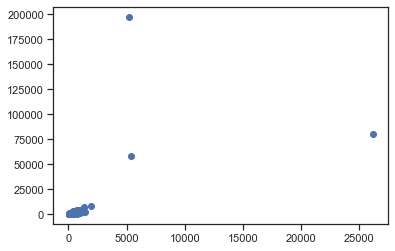

In [101]:
# top_4 = online_rt.groupby('Country').Quantity.sum().sort_values().tail(4)
# top_4

top_3 = online_rt.loc[(online_rt['Country'] == 'Netherlands') | (online_rt['Country'] == 'EIRE') |(online_rt['Country'] == 'Germany')]
top_3 = top_3.groupby('CustomerID').sum()
plt.scatter(top_3.UnitPrice, top_3.Quantity)

top_3

#Another

# top_3 = online_rt.loc[(online_rt['Country'] == 'Netherlands') | (online_rt['Country'] == 'EIRE') |(online_rt['Country'] == 'Germany')].groupby('CustomerID', 'Country').sum()
# plt.scatter(top_3.UnitPrice, top_3.Quantity)

# g = sns.FacetGrid(top_3, col="Country")

# map over a make a scatterplot
# g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

### Step 7. Investigate why the previous results look so uninformative.

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
#### Step 7.1.1 Display the first few rows of that DataFrame.
#### Step 7.1.2 Think about what that piece of code does and display the dtype of UnitPrice
#### Step 7.1.3 Pull data from online_rtfor CustomerIDs 12346.0 and 12347.0.

In [58]:
#Step 7.1.1 
online_rt.head(1)

#Step 7.1.2 
type(online_rt.UnitPrice[0])

#Step 7.1.3
online_rt[(online_rt.CustomerID == 12346.0) | (online_rt.CustomerID == 12347.0 )]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.
To reiterate the question that we were dealing with:
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations. We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries. Or we could do one plot per country. To keep things consistent with the rest of the exercise, let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves: Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue). This exercise goes for sales volume, so let's stick to that.
#### Step 7.2.1 Find out the top 3 countries in terms of sales volume.
#### Step 7.2.2
Now that we have the top 3 countries, we can focus on the rest of the problem:
"Quantity per UnitPrice by CustomerID".
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:
One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total Quantity for each customer. The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

In [64]:
print(online_rt.loc[online_rt.Country == 'Netherlands'].UnitPrice.mean())
print(online_rt.loc[online_rt.Country == 'EIRE'].UnitPrice.mean())
print(online_rt.loc[online_rt.Country == 'Germany'].UnitPrice.mean())

2.6439822259839025
4.875848745882995
3.708487060384999


#### Step 7.3 Modify, select and plot data
#### Step 7.3.1 Add a column to online_rt called Revenue calculate the revenue (Quantity * UnitPrice) from each sale.
#### Step 7.3.2 Group by CustomerID and Country and find out the average price (AvgPrice) each customer spends per unit.
#### Step 7.3.3 Plot

C:\Users\Joy\anaconda3\envs\joy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Joy\anaconda3\envs\joy\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0.5, 1.0, '10 Countries with most orders')

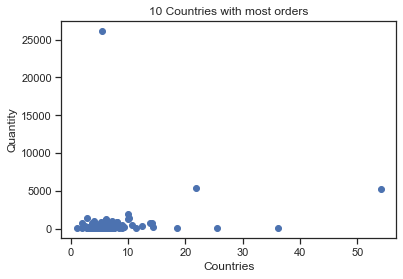

In [111]:
#Step 7.3.1
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

#Step 7.3.2
sale_per_price = online_rt.groupby(['CustomerID', 'Country']).mean()
sale_per_price['AvgPrice'] = sale_per_price.Revenue / sale_per_price.UnitPrice
sale_per_price.head()

#Step 7.3.3 
top_3 = online_rt.loc[(online_rt['Country'] == 'Netherlands') | (online_rt['Country'] == 'EIRE') |(online_rt['Country'] == 'Germany')]
top_3['Revenue'] = top_3.Quantity * top_3.UnitPrice
top_3_group = top_3.groupby(['CustomerID', 'Country']).sum()
top_3_group['AvgPrice'] = top_3_group.Revenue / top_3_group.UnitPrice
top_3_group


plt.scatter(top_3_group.AvgPrice, top_3_group.UnitPrice)
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')



#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair! There are two things to realize: 1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend. 2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of Country and hopefully see a less scattered graph.

#### Step 7.4.1 Plot the data for each CustomerID on a single graph
#### Step 7.4.2 Zoom in so we can see that curve more clearly

(-1.0, 80.0)

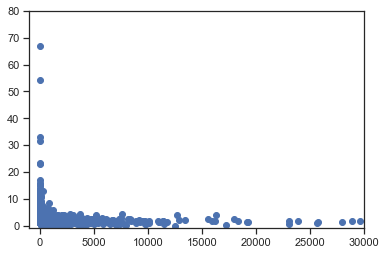

In [134]:
#Step 7.4.1 
CustmerID_group = online_rt.groupby(['CustomerID']).sum()
CustmerID_group['AvgPrice'] = CustmerID_group.Revenue / CustmerID_group.Quantity

plt.scatter(CustmerID_group.Quantity, CustmerID_group.AvgPrice)

#Step 7.4.2
plt.xlim(-1000, 30000)
plt.ylim(-1, 80)

### Step 8. Plot a line chart showing revenue (y) per UnitPrice (x).

#### 8.1 Group UnitPrice by intervals of 1 for prices [0,50), and sum Quantity and Revenue.
#### 8.3 Plot.
#### 8.4 Make it look nicer.
x-axis needs values.
y-axis isn't that easy to read; show in terms of millions.

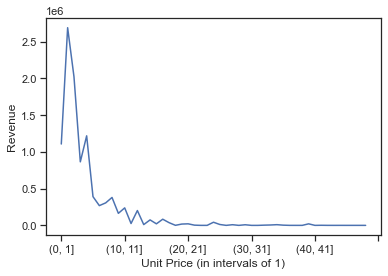

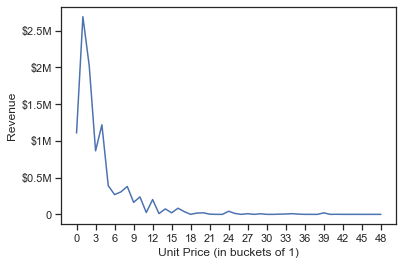

In [191]:
# 전처리가 이해가 잘 안됨!!!! ㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜ
#Step 8.1
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)

#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()


#Step 8.2
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()


#Step 8.3
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()
